# Practicals for lecture 1.2

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec/blob/main/practicals/Practicals_1.2.ipynb)

## Introduction to `pandas`

#### 1.2.0 Numpy bool; Create and index dataframes

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [5]:
# Numpy bool operations
# Take the array of integer numbers below. Use array boolean operations to filter out the numbers that 
# are greater than 5 AND less than 8, OR that are multiple of 7.
np.random.seed(42)
an_array = np.random.randint(0, 10, 100)

an_array[((an_array > 5) & (an_array < 8)) | (an_array % 7 == 0)]

array([6, 7, 6, 6, 7, 7, 7, 7, 0, 0, 6, 6, 6, 6, 7, 0, 7, 7, 6, 7, 7, 0,
       6, 7, 0, 7, 7, 0, 7, 0, 6, 6, 7])

In [7]:
string_data = ['cabbage', 'artichoke', 'banana', 'avocado', 'apple', 'orange']
int_data = [1, 2, 3, 4, 5, 6]
float_data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# Put together the data above in a DataFrame. What happens if you don't specify the index?

df = pd.DataFrame(dict(string_data=string_data, int_data=int_data, float_data=float_data))

In [15]:
# Select the column of the dataframe containing the strings using the name of the column

df["string_data"]

0      cabbage
1    artichoke
2       banana
3      avocado
4        apple
5       orange
Name: string_data, dtype: object

In [10]:
# Select the first two rows of the dataframe
df.loc[:1]

,string_data,int_data,float_data
0,cabbage,1,0.1
1,artichoke,2,0.2


In [16]:
# Select the rows of the dataframe so that the float data is greater than 0.2

df.loc[df["float_data"] > 0.2, "string_data"]

2     banana
3    avocado
4      apple
5     orange
Name: string_data, dtype: object

In [17]:
# Select the rows of the dataframe so that the float data is greater than 0.2 and the int data is less than 5
df.loc[(df["float_data"] > 0.2) & (df["int_data"] < 5)]

,string_data,int_data,float_data
2,banana,3,0.3
3,avocado,4,0.4


In [18]:
# use the .loc property to select the value of the float data in the row with index 3
df.loc[3, "float_data"]

0.4

In [20]:
# Add a new column to the dataframe containing the following data entries:
new_data = [500, 300, 200, 400, 600, 500]

df["new_col"] = new_data
df


,string_data,int_data,float_data,new_col
0,cabbage,1,0.1,500
1,artichoke,2,0.2,300
2,banana,3,0.3,200
3,avocado,4,0.4,400
4,apple,5,0.5,600
5,orange,6,0.6,500


#### 1.2.1 Methods of `pandas` dataframes

In [4]:
# Here we create a fake dataframe containing the results of an psychological test with 30 subjects.
# Subjects can be left-handed or right-handed.
# The test has 2 measures (reaction time - RT, and accuracy)
def create_data_df():
    np.random.seed(42)
    subject_ability = np.random.uniform(0, 1, 30)
    return pd.DataFrame({'subject': [f"subject_{i}" for i in range(30)],
                       'handedness': np.random.choice(['left', 'right'], 30),
                       'RT': subject_ability*100 + np.random.uniform(0, 50, 30),
                       'accuracy': subject_ability + np.random.normal(0.8, 0.1, 30)})
df = create_data_df()

In [8]:
# sort the dataframe by RT:
df.sort_values(by="RT")

,subject,handedness,RT,accuracy
21,subject_21,right,20.995597,0.933407
13,subject_13,right,23.495276,1.004759
4,subject_4,left,24.844587,0.805203
26,subject_26,right,29.903162,0.946232
14,subject_14,left,34.449013,1.079121
15,subject_15,right,37.774315,1.062964
29,subject_29,right,39.987908,0.920822
23,subject_23,right,40.363717,1.270611
19,subject_19,right,43.169640,0.999190
16,subject_16,right,43.991676,1.253786


In [10]:
# Compute the mean and standard deviation of the RT and accuracy across the dataset:
df[["RT", "accuracy"]].mean()

RT          69.113435
accuracy     1.252554
dtype: float64

In [17]:
# Use indexing to select the RT of the left-handed subjects, and compute its 90% percentile:
lefthand_rt_90perc = df.loc[df["handedness"] == "left", "RT"].quantile(0.9)

In [19]:
# Now use the percentile to select the accuracy for left-handed subjects with RT above the 90% percentile:
lefthanded_df = df[df["handedness"] == "left"]
lefthanded_df.loc[lefthanded_df["RT"] > lefthand_rt_90perc, "accuracy"]

7     1.625138
25    1.587076
Name: accuracy, dtype: float64

<Axes: xlabel='RT', ylabel='accuracy'>

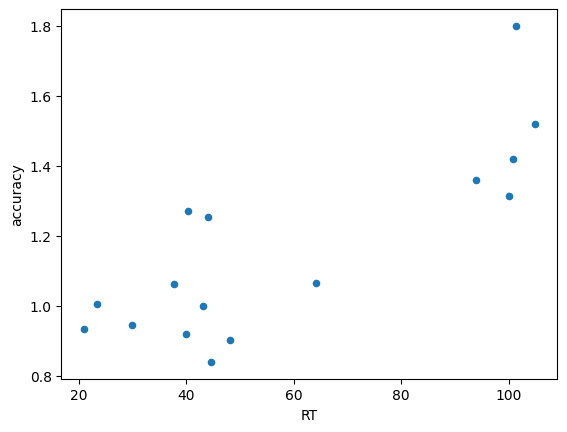

In [20]:
# Create a scatter plot of RT vs accuracy for the right-handed subjects:
righthanded_df = df[df["handedness"] == "right"]
righthanded_df.plot(kind="scatter", x="RT", y="accuracy")

In [21]:
# Take the meteo dataset using the function below
def get_meteo_dataset():
    """Get the meteo dataset from the open-meteo API.
    Note how easy it is to get data from the web with pandas! As long as we give the URL of the csv data, pandas can read it.
    """
    np.random.seed(42)
    URL = "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&hourly=temperature_2m,relativehumidity_2m,precipitation,windspeed_10m,winddirection_10m&start_date=2023-02-01&end_date=2023-05-28&format=csv"
    df = pd.read_csv(URL, skiprows=3)  # read the csv file, skipping the first 3 rows (a header)
    df.columns = [col.split(" ")[0] for col in df.columns]  # simplify column names
    df["time"] = pd.to_datetime(df["time"])  # convert the time column to datetime
    df["hour"], df["dayofyear"] = df["time"].dt.hour, df["time"].dt.dayofyear  # extract the hour and day of year
    df["weekdays"] = df["time"].dt.day_name()  # extract the day of the week

    # Here we artificially corrupt some of the data to make it more interesting
    missing_idx = np.random.choice(df.index[:1000], 100)
    df.loc[missing_idx, :] = np.nan
    return df

meteo_df = get_meteo_dataset()

In [22]:
meteo_df 

,time,temperature_2m,relativehumidity_2m,precipitation,windspeed_10m,winddirection_10m,hour,dayofyear,weekdays
0,2023-02-01 00:00:00,4.6,77.0,0.1,20.9,274.0,0.0,32.0,Wednesday
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-02-01 02:00:00,4.5,74.0,0.0,20.5,273.0,2.0,32.0,Wednesday
3,2023-02-01 03:00:00,4.4,77.0,0.0,18.4,269.0,3.0,32.0,Wednesday
4,2023-02-01 04:00:00,4.3,77.0,0.0,17.1,262.0,4.0,32.0,Wednesday
...,...,...,...,...,...,...,...,...,...
2803,2023-05-28 19:00:00,24.7,53.0,0.0,19.3,99.0,19.0,148.0,Sunday
2804,2023-05-28 20:00:00,23.3,60.0,0.0,18.9,99.0,20.0,148.0,Sunday
2805,2023-05-28 21:00:00,22.0,66.0,0.0,18.5,98.0,21.0,148.0,Sunday
2806,2023-05-28 22:00:00,21.1,71.0,0.0,17.8,97.0,22.0,148.0,Sunday


<Axes: >

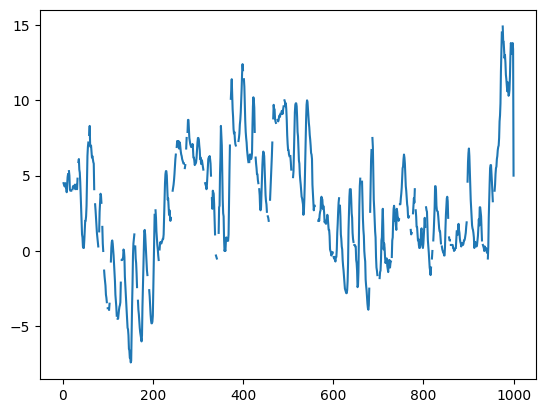

In [24]:
# Plot the temperature and relative humidity for the first 1000 time points. 
# Find points where there's missing data (interrupted line).
meteo_df.loc[:1000, "temperature_2m"].plot()

In [25]:
# Create a new interpolated temperature column by interpolating the temperature column of the dataframe:
meteo_df["temperature_2m_interp"] = meteo_df["temperature_2m"].interpolate()

<Axes: >

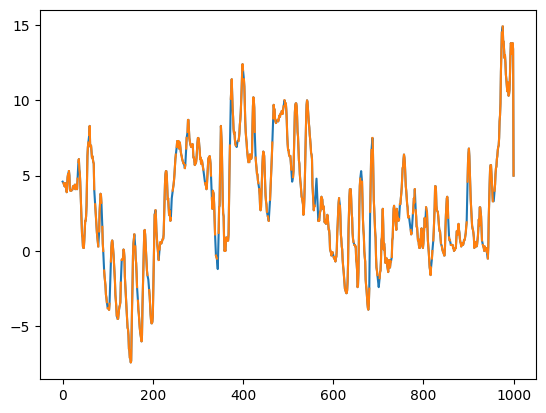

In [27]:
# Make a new plot with the interpolated temperature and the non-interpolated temperature 
# (plot the interpolated first!)
meteo_df.loc[:1000, "temperature_2m_interp"].plot()
meteo_df.loc[:1000, "temperature_2m"].plot()